### Laboratorio de Datos - Ejercitación 1
 20/4/2021

Professor: Enzo Tagliazzucchi



---

### Consigna
Modelo OCEAN de la personalidad, también conocido como "Big 5" (los cinco grandes). Este modelo se basa en hacer una serie de preguntas y luego separar las respuestas en dominios o dimensiones diferentes, de acuerdo a las correlaciones que existen en las respuestas. Este procedimiento se repite muchas veces en distintas poblaciones de sujetos, hasta que se encuentra el mínimo número de dimensiones que sirven para reproducir aceptablemente los datos. Luego, a partir de las preguntas que se asocian a cada una de las dimensiones, se interpreta lo que significa cada una de ellas en términos que sean intuitivos para lo que nosotros entendemos como personalidad.

Las primeras cuatro dimensiones de personalidad que fueron aceptadas son las siguientes:

1.   **Agradabilidad**. Una medida del comportamiento pro-social de los individuos y de su actitud empática y preocupación por los demás.
2.  **Extroversión**. Grado de comportamiento social. Los individuos con valores altos de esta dimensión suelen ser energéticas y positivas.
3.   **Responsabilidad**. Capacidad para cumplir objetivos y tareas y mantener la prolijidad y el orden.
5.   **Neuroticismo**. Personas con valores altos en esta dimensión suelen preocuparse fácilmente por cosas y sufrir de ansiedad y de pensamientos negativos.
En las etapas tempranas del modelo OCEAN, los investigadores se dieron cuenta de que aquellas personas con valores altos de e
sta quinta dimensión eran más propensas a haber consumido marihuana u otras drogas en los campus universitarios de Estados Unidos, y por lo tanto que eran más abiertas a tener experiencias con drogas. Este es precisamente el motivo por el cual se denominó a esta quinta dimensión "**apertura a la experiencia**" (o más sucintamente, "apertura").


---


** OBJETIVO Investigar la relación que existe entre personalidad y consumo de sustancias. Para eso vamos a necesitar los datasets de OCEAN (test de personalidad)  y Coronadelicos (consumo de sustancias) **






In [ ]:
from google.colab import drive # Montar nuestra unidad de Google Drive


import pandas as pd # Manejar los datos

import matplotlib.pylab as plt # Graficar con matplotlib

import seaborn as sbn # Mejores graficos

import numpy as np

In [ ]:
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path OCEAN
filename = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv'
df_ocean = pd.read_csv(filename)
# path Coronadelicos
filename2 = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv'
df_coronadelicos = pd.read_csv(filename2)



In [ ]:
#cambio para visualizar que se cargaron
df_coronadelicos
#df_ocean


,0_religiosidad,0_frecuencia_practicas_religiosas,0_cambio_frecuencia_practicas_religiosas,0_frecuencia_meditacion,0_cambio_frecuencia_meditacion,0_antencion_previa,0_internacion,0_tomando_medicacion,1_psicodelicos_consumidos,2_cuantas_veces_consumio,2_calificacion_experiencia,2_programa_microdosificacion,2_cambio_consumo,2_disminuyo_por_factores,3_psicodelico_mas_significativo,4_psicodelico_ultima_vez,5_psicodelicos_motivos,5_otro_motivo,6_psicoactivos_cosumidos,6_otro_psicoactivo,7_marihuana,7_tabaco,7_estimulantes,7_cafeína,7_sedativos,7_antidepresivos o antipsicoticos,7_disociativos,7_alcohol,7_mdma,7_otro,7_marihuana_disminuyo_por_factores_externos,7_tabaco_disminuyo_por_factores_externos,7_estimulantes_disminuyo_por_factores_externos,7_cafeína_disminuyo_por_factores_externos,7_sedativos_disminuyo_por_factores_externos,7_antidepresivos o antipsicoticos_disminuyo_por_factores_externos,7_disociativos_disminuyo_por_factores_externos,7_alcohol_disminuyo_por_factores_externos,7_mdma_disminuyo_por_factores_externos,7_otro_disminuyo_por_factores_externos,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp,hash
0,0,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"4,8,10",Mate,-999,-999,-999,73,-999,-999,-999,25,-999,59,-999,-999,-999,0,-999,-999,-999,1,-999,0,...,4,4,3,2,1,1,2,2,2,1,1,1,3,1,1,1,6,5,5,5,2,5,4,4,2,2,3,6,6,4,5,6,6,5,6,6,4,2,9/4/2020 17:32:50,-1239720818213738213
1,2,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,1,3,1,1,1,1,1,2,1,1,1,1,1,1,2,1,6,4,6,7,3,7,5,6,2,5,7,6,7,7,6,7,7,7,6,6,2,2,9/4/2020 18:13:45,-2950085219047129132
2,0,5,50,5,50,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"4,8",-999,-999,-999,-999,66,-999,-999,-999,0,-999,-999,-999,-999,-999,0,-999,-999,-999,0,-999,-999,...,1,2,1,1,1,1,2,3,1,1,2,1,1,1,3,3,5,5,5,7,5,4,3,5,6,4,4,5,6,4,7,5,6,6,6,7,2,1,9/4/2020 18:19:48,-5491644562442853484
3,7,5,50,5,50,1,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"1,2,4",-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,42,0,44,1,67,0,...,4,4,4,1,1,1,1,1,1,1,1,2,1,1,1,2,5,5,6,6,4,5,5,6,4,3,4,5,5,5,5,5,5,3,5,4,3,1,9/4/2020 18:20:32,-1149964741979325951
4,9,5,50,3,49,1,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,"1,4,8",-999,2,-999,-999,74,-999,-999,-999,40,-999,-999,1,-999,-999,0,-999,-999,-999,0,-999,-999,...,4,4,2,2,1,1,3,3,3,1,2,2,1,1,3,1,5,5,6,4,3,3,5,5,2,2,5,4,6,4,6,6,3,1,5,4,4,1,9/4/2020 18:20:21,-8003479794066427504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

**Primer paso**: Cargar ambos dataframes por separado y unirlos en un único dataframe usando la columna "hash" y descartando sujetos que no participaron de ambos experimentos.

**Ayuda**: Vimos como hacer esto en el tercer notebook de la segunda clase.

In [ ]:
#Uno los df cargados utilizando 'inner' para que encuentre la interseccion por hash, lo llamo df_oceancorona
df_oceancorona = pd.merge(df_ocean,df_coronadelicos, how='inner',on='hash')
print(df_oceancorona)

      0_1  0_2  ...  13_login_disclaimer_fork         timestamp_y
0       4    5  ...                         2  10/4/2020 20:43:47
1       4    3  ...                         2  10/5/2020 13:23:33
2       5    5  ...                         2  14/4/2020 15:39:08
3       4    4  ...                         2  25/5/2020 16:19:54
4       5    3  ...                         2  11/4/2020 13:21:43
...   ...  ...  ...                       ...                 ...
8231    5    5  ...                         2  23/3/2021 20:02:22
8232    5    4  ...                         2  24/3/2021 19:00:11
8233    3    1  ...                         2  24/3/2021 23:18:10
8234    4    4  ...                         2  25/3/2021 12:08:05
8235    1    2  ...                         2  25/3/2021 12:47:27

[8236 rows x 196 columns]


Armo tres dataframes distintos basado en los siguientes criterios:

*   Sujetos que reportaron haber consumido marihuana al menos una vez.
*   Sujetos que nunca consumieron marihuana.
*   Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.

Construyo índices booleanos para armar los nuevos dataframe que cumplan con las condiciones.





In [ ]:
#exploro los registros cargados en las columnas
df_oceancorona['7_marihuana'].unique()
#df_oceancorona['7_sedativos'].unique()
#df_oceancorona['7_antidepresivos o antipsicoticos'].unique()

array([  49, -999,    0,    7,   48,   50,   65,   56,    3,    1,   11,
         72,   33,   20,   62,   39,   54,   37,   51,   63,   59,  100,
         80,   67,   55,    8,   79,   40,   42,   18,   68,   57,   47,
         46,   17,    2,   53,   34,   75,   71,   44,   13,   66,   61,
         21,   15,   23,   70,   25,   10,   76,   43,   87,   83,   52,
         88,   14,   28,   95,   98,   77,   73,   31,   12,   26,   84,
         19,   82,   16,   96,   58,   60,   78,   24,   85,   35,   27,
         45,    9,   86,   36,   29,    6,   41,   74,   94,   64,   30,
          5,   89,   90,   92,   69,   97,   91,   99,   38,   81,   22,
         32,    4,   93])

In [ ]:
#Genero booleano que cumpla la condicion que hayan consumido marihuana, teniendo en cuenta que todos los valor distintos a -999 cumplen esto
indice= df_oceancorona['7_marihuana'] != -999
#Armo un dataframe con los datos que cumplen esta condicion
df_marihuana_si = df_oceancorona[indice]

In [ ]:

#Le agrego una columna al df con el identificatorio "marihuana si" que luego me sirve para agruparlos
df_marihuana_si['droga'] = "marihuana si"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_marihuana_si.shape #chequeo si filtro

(5182, 197)

In [ ]:
df_marihuana_si

,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y,droga
0,4,5,5,1,5,3,5,1,5,5,5,1,5,1,4,5,5,1,1,5,3,5,1,5,5,5,2,5,1,2,2,5,5,5,3,5,1,5,1,5,...,2,5,3,1,1,1,1,1,1,1,1,1,1,1,1,1,6,7,7,7,6,7,7,6,2,4,6,6,6,6,7,7,7,7,6,7,6,2,10/4/2020 20:43:47,marihuana si
2,5,5,5,3,3,5,5,1,1,5,5,3,5,4,4,3,3,1,4,5,1,4,1,2,5,5,5,5,3,1,1,4,4,4,1,3,4,5,5,5,...,3,4,2,2,2,1,2,3,2,1,3,2,2,2,1,1,7,7,7,7,3,2,7,6,2,1,1,4,6,3,7,6,6,2,6,4,6,2,14/4/2020 15:39:08,marihuana si
4,5,3,2,2,5,5,5,4,4,5,5,1,5,5,5,4,1,1,5,5,4,5,2,2,5,5,5,4,5,5,5,5,4,3,2,2,5,4,5,5,...,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,6,6,6,6,6,5,5,6,2,2,5,6,7,7,7,6,7,5,6,5,7,2,11/4/2020 13:21:43,marihuana si
5,4,5,4,2,3,3,5,3,3,5,3,3,4,4,4,3,4,2,4,2,2,4,2,3,1,5,2,4,4,1,4,3,4,3,5,4,5,4,3,5,...,4,2,1,1,1,1,2,2,2,1,1,2,3,1,3,1,5,5,6,4,2,4,3,2,2,6,5,6,6,6,4,6,7,3,4,4,7,2,9/4/2020 20:40:16,marihuana si
6,4,1,3,2,3,2,5,4,3,5,3,1,3,3,2,4,5,4,5,5,3,5,3,3,5,5,5,5,3,1,4,5,3,4,5,3,2,4,3,5,...,1,3,1,1,1,1,1,2,1,1,1,1,2,1,2,1,4,7,4,7,7,4,2,7,1,4,7,7,7,7,7,7,7,4,7,4,3,2,10/4/2020 11:06:49,marihuana si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,3,5,2,3,4,4,3,2,4,5,3,4,5,2,5,3,3,3,2,5,4,4,3,2,4,5,4,2,4,4,5,4,3,4,1,3,2,3,3,4,...,1,4,1,1,1,1,3,1,1,1,2,1,1,1,1,2,3,5,6,4,6,6,7,5,4,2,2,2,6,6,6,6,7,4,6,3,2,2,21/3/2021 23:04:50,marihuana si
8231,5,5,2,5,5,3,4,4,3,5,4,3,3,2,4,4,4,4,5,5,3,3,4,1,5,2,2,2,5,5,5,5,2,4,3,4,4,2,3,5,...,1,2,3,1,2,1,1,3,2,2,3,1,3,1,3,3,3,6,5,5,3,1,4,3,1,2,3,3,6,1,3,7,2,2,3,4,1,2,23/3/2021 20:02:22,marihuana si
8233,3,1,3,4,3,2,4,2,4,5,3,1,5,2,4,3,4,2,4,3,5,5,3,2,3,3,3,4,2,1,4,5,4,4,3,2,2,4,4,3,...,2,4,1,1,1,1,2,1,1,1,1,2,1,1,2,2,6,6,5,7,4,3,5,3,2,5,4,6,4,3,7,6,6,3,4,4,1,2,24/3/2021 23:18:10,marihuana si
8234,4,4,2,4,2,4,5,5,5,5,2,2,5,3,4,3,4,5,2,3,4,5,5,4,3,5,3,3,3,4,4,5,5,4,4,3,1,5,3,4,...,2,4,1,1,1,1,1,1,1,1,1,1,2,1,1,2,6,4,6,1,6,7,3,4,2,6,2,4,7,5,6,7,6,7,7,2,5,2,25/3/2021 12:08:05,marihuana si


In [ ]:
#Repito lo mismo, filtrando para las personas que no consumieron marihuana
indice_no= df_oceancorona['7_marihuana'] == -999
df_marihuana_no = df_oceancorona[indice_no]
#Le agrego una columna con el identificatorio "marihuana no" que luego me sirve para agruparlos
df_marihuana_no['droga'] = "marihuana no"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_marihuana_no.shape

(3054, 197)

In [ ]:
#Creo un df con aquelles participantes que hayan consumido al menos una de las tres sustancias
indice_sedativos_anti= (df_oceancorona['7_sedativos'] != -999) | (df_oceancorona['7_antidepresivos o antipsicoticos'] != -999)

df_sedativos_anti= df_oceancorona [indice_sedativos_anti]

df_sedativos_anti.shape

#Le agrego una columna con el identificatorio "drogas de prescripcion" que luego me sirve para agruparlos
df_sedativos_anti['droga'] = "drogas prescripcion"
df_sedativos_anti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y,droga
0,4,5,5,1,5,3,5,1,5,5,5,1,5,1,4,5,5,1,1,5,3,5,1,5,5,5,2,5,1,2,2,5,5,5,3,5,1,5,1,5,...,2,5,3,1,1,1,1,1,1,1,1,1,1,1,1,1,6,7,7,7,6,7,7,6,2,4,6,6,6,6,7,7,7,7,6,7,6,2,10/4/2020 20:43:47,drogas prescripcion
3,4,4,5,4,4,3,5,3,3,5,4,1,5,3,4,4,2,2,4,4,3,4,3,4,4,4,1,4,3,3,2,5,4,5,1,4,2,3,2,4,...,1,1,1,3,2,1,2,1,2,3,1,2,2,1,3,2,5,5,7,6,4,4,6,4,3,1,4,3,4,2,6,6,3,3,6,3,2,2,25/5/2020 16:19:54,drogas prescripcion
9,5,4,4,2,2,4,4,4,4,5,4,1,5,4,4,3,3,4,4,4,2,4,4,4,4,4,2,3,4,1,3,3,4,4,1,4,4,4,4,5,...,1,4,1,1,1,1,1,2,1,1,1,1,1,1,1,1,5,6,5,6,5,6,6,6,3,3,5,5,5,6,5,5,7,6,6,6,3,2,6/5/2020 21:37:08,drogas prescripcion
12,4,4,2,5,3,3,4,3,1,4,2,3,5,4,3,3,2,4,5,4,2,4,5,1,3,3,5,4,5,3,3,3,2,3,2,2,4,2,4,4,...,4,1,3,3,3,1,2,2,2,1,2,2,1,2,2,3,3,3,4,3,2,1,2,2,2,1,2,3,4,1,5,4,2,2,3,1,4,2,14/4/2020 13:17:37,drogas prescripcion
16,4,4,2,4,4,1,3,3,2,4,3,2,3,4,4,2,3,5,4,4,1,4,3,3,4,3,3,2,4,3,4,2,3,3,2,4,4,3,4,5,...,1,3,2,3,1,2,3,2,2,1,1,2,3,2,3,3,3,5,4,3,3,3,2,3,3,4,1,3,6,4,5,5,4,4,4,4,4,2,14/5/2020 22:21:36,drogas prescripcion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,5,2,2,3,4,3,4,4,1,5,3,2,4,5,4,4,3,4,5,5,1,4,5,2,5,3,4,3,5,5,3,4,2,3,4,5,3,4,5,3,...,3,4,3,3,3,3,3,1,1,1,1,2,3,2,2,3,4,6,3,7,1,7,1,4,1,4,4,6,7,7,4,6,2,7,7,5,1,2,1/3/2021 8:58:17,drogas prescripcion
8227,3,2,3,1,4,3,5,5,4,5,4,1,3,4,4,2,5,5,4,5,3,5,5,4,5,3,2,3,3,5,4,5,5,3,5,4,5,1,3,5,...,1,4,2,2,3,3,1,1,3,1,1,2,3,1,3,2,3,3,5,4,3,6,3,2,1,4,6,6,7,6,5,7,4,7,5,6,4,2,7/3/2021 1:57:40,drogas prescripcion
8228,5,2,4,3,5,2,4,4,3,5,5,2,3,4,5,5,4,4,4,5,2,4,3,2,5,5,2,4,4,5,2,5,4,4,1,5,3,4,3,5,...,3,4,1,1,2,1,1,1,1,1,1,2,1,1,2,1,6,5,5,6,2,5,5,6,2,3,2,5,7,2,5,5,5,3,5,3,1,2,10/3/2021 12:29:56,drogas prescripcion
8232,5,4,4,3,4,2,4,3,2,5,4,3,4,4,4,4,4,2,4,5,2,4,2,2,4,4,2,4,5,5,3,4,4,3,3,4,3,4,4,5,...,1,4,3,2,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,7,4,4,6,6,4,3,5,7,6,6,7,6,4,4,5,5,1,2,24/3/2021 19:00:11,drogas prescripcion


Armo nuevos dataframes que contengan columnas para las 5 dimensiones de la personalidad con
```
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
```





In [ ]:
#Armo el dataframe que incluye las 5 personalidades
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
df_personalidades = df_oceancorona[columnas].copy()


In [ ]:
df_personalidades.shape

(8236, 5)

Exploro los datos mediante un radar plot donde las 5 dimensiones sean O,C,E,A,N y se muestren en distintos colores los valores promedios de cada dimension para cada grupo.

In [ ]:
def radar_plot(df, title = '',): #estoy generando una fx, adentro de() los parametros que recibe, el primero df, segundo titulo
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data

    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

In [ ]:
# primero voy a crear un dataframe con los datos de la personalidad de los participantes de los tres grupos 'Marihuana', 'No marihuana', 'Drogas de prescripción'.
df_merged_marihuanas = pd.merge(df_marihuana_si, df_marihuana_no, how='outer')
df_merged_marihuanas

,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y,droga
0,4,5,5,1,5,3,5,1,5,5,5,1,5,1,4,5,5,1,1,5,3,5,1,5,5,5,2,5,1,2,2,5,5,5,3,5,1,5,1,5,...,2,5,3,1,1,1,1,1,1,1,1,1,1,1,1,1,6,7,7,7,6,7,7,6,2,4,6,6,6,6,7,7,7,7,6,7,6,2,10/4/2020 20:43:47,marihuana si
1,5,5,5,3,3,5,5,1,1,5,5,3,5,4,4,3,3,1,4,5,1,4,1,2,5,5,5,5,3,1,1,4,4,4,1,3,4,5,5,5,...,3,4,2,2,2,1,2,3,2,1,3,2,2,2,1,1,7,7,7,7,3,2,7,6,2,1,1,4,6,3,7,6,6,2,6,4,6,2,14/4/2020 15:39:08,marihuana si
2,5,3,2,2,5,5,5,4,4,5,5,1,5,5,5,4,1,1,5,5,4,5,2,2,5,5,5,4,5,5,5,5,4,3,2,2,5,4,5,5,...,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,6,6,6,6,6,5,5,6,2,2,5,6,7,7,7,6,7,5,6,5,7,2,11/4/2020 13:21:43,marihuana si
3,4,5,4,2,3,3,5,3,3,5,3,3,4,4,4,3,4,2,4,2,2,4,2,3,1,5,2,4,4,1,4,3,4,3,5,4,5,4,3,5,...,4,2,1,1,1,1,2,2,2,1,1,2,3,1,3,1,5,5,6,4,2,4,3,2,2,6,5,6,6,6,4,6,7,3,4,4,7,2,9/4/2020 20:40:16,marihuana si
4,4,1,3,2,3,2,5,4,3,5,3,1,3,3,2,4,5,4,5,5,3,5,3,3,5,5,5,5,3,1,4,5,3,4,5,3,2,4,3,5,...,1,3,1,1,1,1,1,2,1,1,1,1,2,1,2,1,4,7,4,7,7,4,2,7,1,4,7,7,7,7,7,7,7,4,7,4,3,2,10/4/2020 11:06:49,marihuana si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,2,3,4,3,4,5,5,4,3,4,2,1,5,5,3,3,5,5,5,5,5,5,5,3,5,3,5,3,5,3,5,5,5,5,3,2,5,3,5,5,...,1,3,1,1,2,3,2,1,2,1,1,1,1,2,1,2,4,7,7,7,7,7,5,7,5,7,4,4,7,7,6,4,7,7,7,4,3,2,14/4/2020 14:34:18,marihuana no
8232,5,4,5,1,4,1,5,1,4,4,5,4,5,4,5,5,2,2,5,5,1,5,3,3,5,4,2,4,3,4,2,5,5,5,4,5,4,4,4,4,...,2,3,1,1,1,1,1,2,1,1,1,1,1,2,2,1,7,4,2,7,4,2,2,2,2,6,6,6,7,6,7,6,7,6,5,6,2,2,8/2/2021 23:32:13,marihuana no
8233,5,2,5,1,4,2,4,2,2,4,4,4,4,4,4,4,4,3,4,5,1,5,2,3,5,3,4,5,4,4,2,4,4,4,3,5,4,4,4,3,...,2,5,2,1,1,1,1,1,1,1,1,1,1,2,1,1,7,4,5,5,4,3,6,6,2,2,4,6,6,6,6,4,7,3,6,6,2,2,16/2/2021 9:30:53,marihuana no
8234,3,2,5,1,3,5,4,2,2,5,2,1,5,3,4,2,4,1,3,3,4,5,4,3,3,4,4,5,3,4,4,4,5,3,3,3,3,5,4,5,...,1,4,1,1,1,1,2,2,1,1,2,1,1,1,2,2,5,4,6,6,3,4,5,5,2,3,5,5,5,4,7,7,7,2,5,4,4,2,5/3/2021 21:18:58,marihuana no


In [ ]:
df_merged = pd.merge(df_merged_marihuanas, df_sedativos_anti, how='outer')
df_merged

,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,0_16,0_17,0_18,0_19,0_20,0_21,0_22,0_23,0_24,0_25,0_26,0_27,0_28,0_29,0_30,0_31,0_32,0_33,0_34,0_35,0_36,0_37,0_38,0_39,0_40,...,10_agitado,10_activo,10_miedoso,11_se_lo_que_quiero_hacer,11_aceptar_lo_que_sale_mal,11_importa_pensar_en_futuro,11_puedo_decir_lo_que_pienso,11_le_caigo_bien_a_la_gente,11_podre_lograr_metas,11_cuento_con_personas_que_ayudan,11_en_general_me_llevo_bien_con_la_gente,11_hago_lo_que_quiero,11_capaz_de_pensar_proyecto_de_vida,11_aceptar_equivocaciones_mejorar,11_tomar_decisiones_sin_dudar,11_encaro_oblicaciones_sin_problemas,12_llevo_a_cabo_planes_hasta_el_final,12_manejo_problemas_distintos_modos,12_hacer_cosas_sin_depender,12_mantengo_interes_cosas_importantes,12_tomar_las_cosas_sin_preocupacion,12_amigable_conmigo,12_manejar_varias_cosas,12_decidido,12_rara_vez_pregunto_objetivo_de_las_cosas,12_hago_cosas_de_a_una,12_auto_disciplinado,12_mantengo_interes,12_usualmente_encuentro_cosas_de_que_reirme,12_confianza_en_mi_pasar_tiempos_dificiles,12_en_emergencias_pueden_confiar_en_mi,12_ver_situacion_varios_puntos_de_vista,12_mi_vida_tiene_sentido,12_no_insito_en_cosas_que_no_puedo_hacer_nada,12_encuentro_salida_en_situacion_dificil,12_tengo_energia_para_lo_que_tengo_que_hacer,12_siento_comodo_si_hay_gente_a_la_que_no_le_agrado,13_login_disclaimer_fork,timestamp_y,droga
0,4,5,5,1,5,3,5,1,5,5,5,1,5,1,4,5,5,1,1,5,3,5,1,5,5,5,2,5,1,2,2,5,5,5,3,5,1,5,1,5,...,2,5,3,1,1,1,1,1,1,1,1,1,1,1,1,1,6,7,7,7,6,7,7,6,2,4,6,6,6,6,7,7,7,7,6,7,6,2,10/4/2020 20:43:47,marihuana si
1,5,5,5,3,3,5,5,1,1,5,5,3,5,4,4,3,3,1,4,5,1,4,1,2,5,5,5,5,3,1,1,4,4,4,1,3,4,5,5,5,...,3,4,2,2,2,1,2,3,2,1,3,2,2,2,1,1,7,7,7,7,3,2,7,6,2,1,1,4,6,3,7,6,6,2,6,4,6,2,14/4/2020 15:39:08,marihuana si
2,5,3,2,2,5,5,5,4,4,5,5,1,5,5,5,4,1,1,5,5,4,5,2,2,5,5,5,4,5,5,5,5,4,3,2,2,5,4,5,5,...,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,6,6,6,6,6,5,5,6,2,2,5,6,7,7,7,6,7,5,6,5,7,2,11/4/2020 13:21:43,marihuana si
3,4,5,4,2,3,3,5,3,3,5,3,3,4,4,4,3,4,2,4,2,2,4,2,3,1,5,2,4,4,1,4,3,4,3,5,4,5,4,3,5,...,4,2,1,1,1,1,2,2,2,1,1,2,3,1,3,1,5,5,6,4,2,4,3,2,2,6,5,6,6,6,4,6,7,3,4,4,7,2,9/4/2020 20:40:16,marihuana si
4,4,1,3,2,3,2,5,4,3,5,3,1,3,3,2,4,5,4,5,5,3,5,3,3,5,5,5,5,3,1,4,5,3,4,5,3,2,4,3,5,...,1,3,1,1,1,1,1,2,1,1,1,1,2,1,2,1,4,7,4,7,7,4,2,7,1,4,7,7,7,7,7,7,7,4,7,4,3,2,10/4/2020 11:06:49,marihuana si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,5,2,2,3,4,3,4,4,1,5,3,2,4,5,4,4,3,4,5,5,1,4,5,2,5,3,4,3,5,5,3,4,2,3,4,5,3,4,5,3,...,3,4,3,3,3,3,3,1,1,1,1,2,3,2,2,3,4,6,3,7,1,7,1,4,1,4,4,6,7,7,4,6,2,7,7,5,1,2,1/3/2021 8:58:17,drogas prescripcion
9974,3,2,3,1,4,3,5,5,4,5,4,1,3,4,4,2,5,5,4,5,3,5,5,4,5,3,2,3,3,5,4,5,5,3,5,4,5,1,3,5,...,1,4,2,2,3,3,1,1,3,1,1,2,3,1,3,2,3,3,5,4,3,6,3,2,1,4,6,6,7,6,5,7,4,7,5,6,4,2,7/3/2021 1:57:40,drogas prescripcion
9975,5,2,4,3,5,2,4,4,3,5,5,2,3,4,5,5,4,4,4,5,2,4,3,2,5,5,2,4,4,5,2,5,4,4,1,5,3,4,3,5,...,3,4,1,1,2,1,1,1,1,1,1,2,1,1,2,1,6,5,5,6,2,5,5,6,2,3,2,5,7,2,5,5,5,3,5,3,1,2,10/3/2021 12:29:56,drogas prescripcion
9976,5,4,4,3,4,2,4,3,2,5,4,3,4,4,4,4,4,2,4,5,2,4,2,2,4,4,2,4,5,5,3,4,4,3,3,4,3,4,4,5,...,1,4,3,2,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,7,4,4,6,6,4,3,5,7,6,6,7,6,4,4,5,5,1,2,24/3/2021 19:00:11,drogas prescripcion


In [ ]:
# Selecciono las columnas que quiero quedarme del df
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness', 'droga']
df_merged_personalidades = df_merged[columnas].copy()

In [ ]:
# Agrupo los datos segun grupo de consumo
personalidad_segun_drogas = df_merged_personalidades.groupby('droga').mean()

In [ ]:
#relativizo mis datos para que se encuentren en valores de 0-1

maximo = max(personalidad_segun_drogas.max()) #maximo valor de personalidad_segun_drogas

personalidad_segun_drogas = personalidad_segun_drogas.apply(lambda x: x / maximo, axis = 1)

In [ ]:
personalidad_segun_drogas

,1_extraversion,1_agreeableness,1_conscientiousness,1_neuroticism,1_openness
droga,,,,,
drogas prescripcion,0.650866,0.820219,0.738431,0.719944,1.000000
marihuana no,0.650622,0.838030,0.791428,0.658164,0.965847
marihuana si,0.658511,0.829971,0.746559,0.663035,0.991568


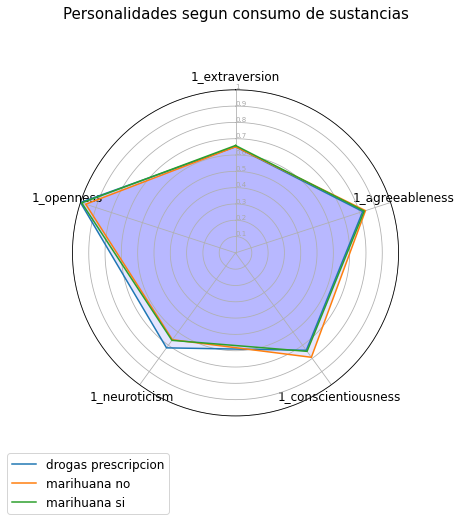

In [ ]:
radar_plot(personalidad_segun_drogas, title = 'Personalidades segun consumo de sustancias',)

<font color= "purple">**ANÁLISIS** </font>



1.   En relacion a los grupos consumidores de marihuana vs no consumidores: Los grupos de personas consumidoras parecen mostrar una leve inclinacion a mayor apertura. No parece haber diferencias entre grupos respecto a la extroversion y la agradabilidad. El grupo no consumidor parece mostrar un pequenio aumento de responsalibilidad respecto a los consumidores.
2.   El grupo que consume drogas de prescripcion, tiene mayor inclinacion hacia un neuroticismo en comparacion a los demas grupos. No hay diferencias de extroversion y de agradabilidad. La apertura es levemente mayor en este grupo respecto a les consumidores de marihuana, diferencia que se acentua un poco respecto a los no consumidores. El rasgo responsabilidad resulta levemente menor en este grupo que en grupo consumidor de marihuana





In [ ]:
#Genero df con la informacion a comparar "conscientuousness" y "neuroticism"

columnas3 = ['1_conscientiousness', '1_neuroticism',  'droga']

df_paso5 = df_merged[columnas3].copy()

#Voy a quedarme con lso dos grupos que quiero comparar, "drogas de prescripcion" y "marihuana no/no consumidores"

indice = df_paso5[df_paso5['droga']=='marihuana si'].index # el indice donde esta la fila que dice "marihuana si" en la columna "droga"
df_paso5.drop(indice, inplace=True)

In [ ]:
df_paso5['droga'].value_counts()

marihuana no           3054
drogas prescripcion    1742
Name: droga, dtype: int64

In [ ]:
df_paso5

,1_conscientiousness,1_neuroticism,droga
5182,30,19,marihuana no
5183,35,22,marihuana no
5184,39,23,marihuana no
5185,40,34,marihuana no
5186,27,29,marihuana no
...,...,...,...
9973,21,35,drogas prescripcion
9974,19,22,drogas prescripcion
9975,29,27,drogas prescripcion
9976,34,31,drogas prescripcion


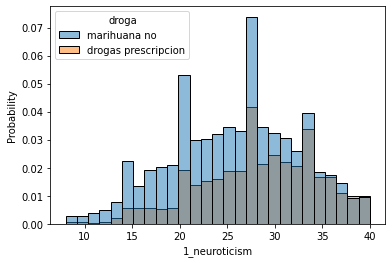

In [ ]:
#Voy a hacer histogramas para graficar los datos

sbn.histplot(data=df_paso5, x='1_neuroticism', hue='droga', stat="probability")

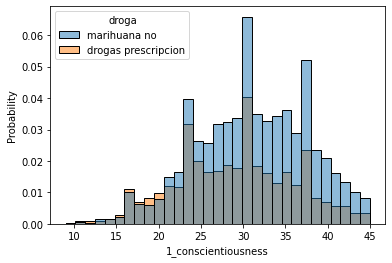

In [ ]:
sbn.histplot(data=df_paso5, x='1_conscientiousness', hue='droga', stat="probability")

Estimo la magnitud de la diferencia calculando la separación entre las distribuciones normales.

Utilizo la D de Cohen para realizar la estadística descriptiva.

Una d cercana a 0.20 se considera un efecto de magnitud pequeña, cercana a 0.50 un efecto de magnitud media, y así sucesivamente. El signo de d  indica la dirección del efecto

In [ ]:
#Calculo la media y el desvio de los rasgos de los grupos que voy a comparar
#Primero para conscientiousness de drogas de prescripcion, lo que voy a comparar contra los no consumidores

indice_drogaspresc = df_paso5['droga'] == 'drogas prescripcion'

d = df_paso5 ['1_conscientiousness'].copy()

media = np.mean (d[indice_drogaspresc])

print('Media drogas prescripcion: {:.3f}' .format(media))

desvest = np.std (d[indice_drogaspresc])

print(' Desvio estandar drogas prescripcion: {:.3f}' .format(desvest))

#Luego, calculo estos valores para conscientiousness de no consumidores (marihuana no)


indice_nocons = df_paso5['droga'] == 'marihuana no'


media2 = np.mean (d[indice_nocons])

print('Media no consumidores: {:.3f}' .format(media2))

desvest2 = np.std (d[indice_nocons])

print(' Desvio estandar no consumidores: {:.3f}' .format(desvest2))




Media drogas prescripcion: 28.983
 Desvio estandar drogas prescripcion: 6.971
Media no consumidores: 31.063
 Desvio estandar no consumidores: 6.625


In [ ]:
# Calculo D de Cohen comparando 'conscientiousness' entre grupos 'drogas de prescripcion' y 'no consumidores'
mm = media - media2
s2s2 = (desvest**2 + desvest2**2)/2
sqrt = np.sqrt(s2s2)

D_Cohen_conscientiousness = mm/sqrt

D_Cohen_conscientiousness

-0.3058742473453661

In [ ]:
#Tambien podria definir una funcion para la D de Cohen y luego darle los valores de las medias y los desvios para que me calcule dicho parametro

def d_cohen(x1,x2,s1,s2):
  d = (x1-x2) / (np.sqrt((s1**2 + s2**2)/2))
  return d

In [ ]:
d_cohen(media, media2, desvest, desvest2)

-0.3058742473453661

In [ ]:
#Segundo, elijo comparar neuroticism de drogas de prescripcion vs no consumidores

indice_drogaspresc = df_paso5['droga'] == 'drogas prescripcion'

d = df_paso5 ['1_neuroticism'].copy()

media3 = np.mean (d[indice_drogaspresc])

print('Media Neuroticism drogas prescripcion: {:.3f}' .format(media3))

desvest3 = np.std (d[indice_drogaspresc])

print(' Desvio estandar neuroticism drogas prescripcion: {:.3f}' .format(desvest))

#Segundo para conscientiousness de no consumidores (marihuana no)


indice_nocons = df_paso5['droga'] == 'marihuana no'

media4 = np.mean (d[indice_nocons])

print('Media neuroticism no consumidores: {:.3f}' .format(media2))

desvest4 = np.std (d[indice_nocons])

print(' Desvio estandar neuroticism no consumidores: {:.3f}' .format(desvest2))


Media Neuroticism drogas prescripcion: 28.257
 Desvio estandar neuroticism drogas prescripcion: 6.971
Media neuroticism no consumidores: 31.063
 Desvio estandar neuroticism no consumidores: 6.625


In [ ]:
#Ahora que tengo las medias y los desvios estandar a comparar, utilizo la funcion " d_cohen" para obtener dicho parametro

d_cohen(media3, media4, desvest3, desvest4)


0.37561238064871977

In [ ]:
#La comparacion de los rasgos de personalidad de "conscientiousness" y "neuroticism" entre los grupos "drogas de prescripcion" vs "no consumidores"
#mediante la D de Cohen, nos indica que la magnitud de la diferencia es entre moderada y pequena